In [68]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# Initial parameters
h=0.02
size = int(1/h)
T = 12.0  
DELTA_T = 0.001
time_steps = int(T / DELTA_T)  
A=0.00028
B=0.005
TAU=0.1
KAPPA=-0.005
step_plot = int(time_steps // T)


# Initialize phi and psi matrices
phi = np.zeros((time_steps, size, size))
psi = np.zeros((time_steps, size, size))
phi[0, :, :] = np.random.rand(size, size)
psi[0, :, :] = np.random.rand(size, size)

In [74]:
def laplacian(arr):
    # Compute the Laplacian operator
    bottom = arr[2:, 1:-1]
    top = arr[:-2, 1:-1]
    right = arr[1:-1, 2:]
    left = arr[1:-1, :-2]
    center = arr[1:-1, 1:-1]
    return (right + left + top + bottom - 4*center)/h**2
    
def set_boundary_conditions(t):
    # Set boundary conditions at the edges
    for fun in (phi, psi):
        fun[t, 0, :] = fun[t, 1, :]
        fun[t, -1, :] = fun[t,-2, :]
        fun[t, :, 0] = fun[t, :, 1]
        fun[t, :, -1] = fun[t, :, -2]

def plot_patterns(arr): 
    # Plot the patterns at different time steps
    nrows, ncols = 3, 4
    fig, axs = plt.subplots(nrows, ncols, figsize=(15, 15))
    fig.suptitle('Turing Patterns for 12 times', fontsize=16)
    for i, ax in enumerate(axs.flat):
        im = ax.imshow(arr[i][i*step_plot,:,:], 
                  extent=[0, 1, 0, 1],
                  interpolation='bilinear',
                  cmap='inferno')
        ax.set_title(f'$t={i} s$')
    plt.tight_layout()
    plt.savefig('turing-patterns.pdf')
    plt.show()
        
        
def solve_equations(arr):
    # Solve the reaction-diffusion equations
    plot_count = 0
    for t in range(time_steps-1):
        laplacian_phi = laplacian(phi[t,:,:])
        laplacian_psi = laplacian(psi[t,:,:])
        phi[t+1, 1:-1, 1:-1] = phi[t, 1:-1, 1:-1] + DELTA_T*\
        (A*laplacian_phi + phi[t, 1:-1, 1:-1] - phi[t, 1:-1, 1:-1]**3 - psi[t, 1:-1, 1:-1] + KAPPA)
        psi[t+1, 1:-1, 1:-1] = psi[t, 1:-1, 1:-1] + (DELTA_T / TAU)*\
        (B*laplacian_psi + phi[t, 1:-1, 1:-1] - psi[t, 1:-1, 1:-1])
        set_boundary_conditions(t+1)
        if t % step_plot == 0 and t <= T * step_plot:
            arr.append(phi)
    return arr        

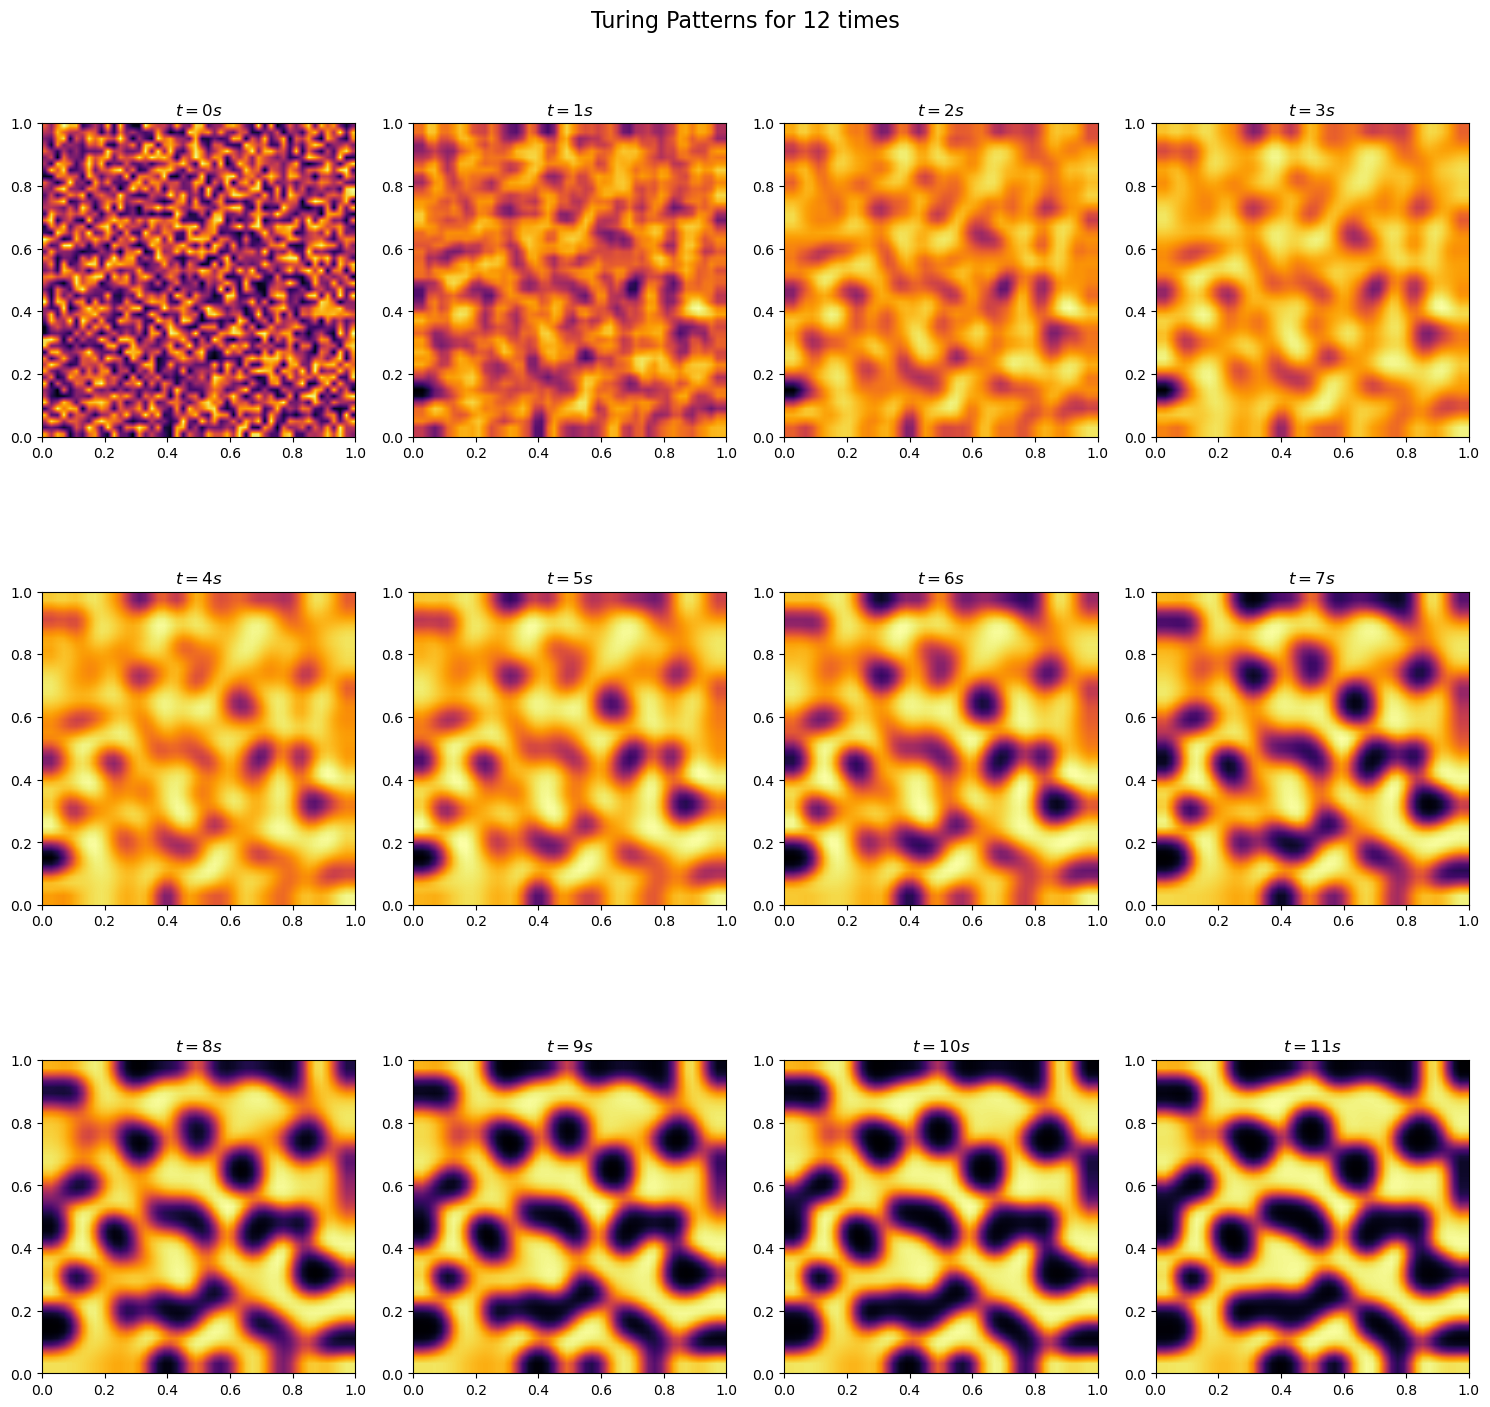

In [75]:
phi_arr=[]
solutions_arr = solve_equations(phi_arr)
plot_patterns(solutions_arr)